In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Dados/CHURN_CREDIT_MOD14_TRATADO.csv', delimiter =',')

df.head(10)

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,10787603.0,0.0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,10787603.0,0.0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,10787603.0,0.0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,10787603.0,0.0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,10787603.0,0.0
5,688,SPAIN,Female,18.0,2,0.00,2,1.0,0.0,10787603.0,0.0
6,803,SPAIN,Male,18.0,6,0.00,1,0.0,0.0,10787603.0,1.0
7,578,SPAIN,Female,18.0,8,71843.15,2,0.0,1.0,10787603.0,0.0
8,598,SPAIN,Male,18.0,6,0.00,2,0.0,1.0,10787603.0,0.0
9,624,SPAIN,Female,18.0,6,0.00,2,0.0,1.0,10787603.0,0.0


## Verificando a existência de dados nulos...

In [3]:
# A PARTIR DO COMANDO INFO()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     100000 non-null  int64  
 1   CustomerId     100000 non-null  int64  
 2   Sobrenome      100000 non-null  str    
 3   Credit_Score   100000 non-null  int64  
 4   Pais           100000 non-null  str    
 5   Genero         99990 non-null   str    
 6   Idade          99794 non-null   float64
 7   Tempo_Credito  100000 non-null  int64  
 8   Balance        100000 non-null  float64
 9   Qtd_Produtos   100000 non-null  int64  
 10  Possui_Cartao  100000 non-null  float64
 11  Membro_Ativo   100000 non-null  float64
 12  Salario_Anual  34464 non-null   float64
 13  Churn          99911 non-null   float64
dtypes: float64(6), int64(5), str(3)
memory usage: 10.7 MB


In [4]:
# FORMA 01
existe_valores_nulos = df.isnull().values.any()
print(existe_valores_nulos)

True


In [5]:
# FORMA 02 ---> QUANTIDADE VALORES NULOS POR COLUNA
df.isnull().sum()

Unnamed: 0           0
CustomerId           0
Sobrenome            0
Credit_Score         0
Pais                 0
Genero              10
Idade              206
Tempo_Credito        0
Balance              0
Qtd_Produtos         0
Possui_Cartao        0
Membro_Ativo         0
Salario_Anual    65536
Churn               89
dtype: int64

In [6]:
# TIRANDO A PORCENTAGEM DA QUANTIDADE DE REGISTROS NULOS
valores_nulos = df.isnull().sum()
quantidade_linhas = len(df)

# (df.isnull().sum() / len(df)) * 100
porcentagem = (valores_nulos / quantidade_linhas) * 100
print(porcentagem)

Unnamed: 0        0.000
CustomerId        0.000
Sobrenome         0.000
Credit_Score      0.000
Pais              0.000
Genero            0.010
Idade             0.206
Tempo_Credito     0.000
Balance           0.000
Qtd_Produtos      0.000
Possui_Cartao     0.000
Membro_Ativo      0.000
Salario_Anual    65.536
Churn             0.089
dtype: float64


## Tratando dados nulos...

### Coluna de Gênero

In [7]:
# MOSTRANDO APENAS OS REGISTROS COM GÊNERO EM NULO
df[df['Genero'].isnull()]

,Unnamed: 0,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
61074,61074,15601008,Y?an,667,France,NaN,33.0,3,0.00,2,1.0,1.0,NaN,0.0
61075,61075,15757895,Ritchie,642,France,NaN,33.0,4,150507.21,1,1.0,1.0,NaN,0.0
61076,61076,15806983,Moss,646,France,NaN,33.0,3,137148.68,1,1.0,0.0,NaN,0.0
61077,61077,15761340,Bullen,593,France,NaN,33.0,4,0.00,2,1.0,1.0,NaN,0.0
61078,61078,15790594,Nnaife,653,France,NaN,33.0,6,0.00,2,1.0,0.0,NaN,0.0
61079,61079,15679024,Hsia,585,France,NaN,33.0,2,97565.74,1,0.0,0.0,NaN,0.0
61080,61080,15751553,Bellucci,758,France,NaN,33.0,9,119782.77,1,1.0,0.0,NaN,0.0
61081,61081,15592578,Ch'ien,679,France,NaN,33.0,7,107499.24,1,1.0,0.0,NaN,0.0
61082,61082,15592714,Tsao,748,France,NaN,33.0,6,0.00,2,1.0,1.0,NaN,0.0
61083,61083,15578788,Ch'ien,516,France,NaN,33.0,3,0.00,1,1.0,1.0,NaN,0.0


Como são apenas 0,01% dos registros, não existe problema em excluir essas linhas

In [8]:
# FAZENDO A EXCLUSÃO DOS REGISTROS
df.dropna(subset = ['Genero'], inplace = True)

registros_nulos = df['Genero'].isnull().sum()
print(registros_nulos)

0


### Coluna de Idades

Também representa uma porcentagem muito pequena dos dados (cerca de 0,2%), portanto, não há problema em excluir esses registros

In [9]:
df[df['Idade'].isnull()]

,Unnamed: 0,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
125,125,15797919,Okwudilichukwu,699,Spain,Male,NaN,1,0.00,2,1.0,1.0,NaN,0.0
126,126,15807221,Weaver,555,Spain,Male,NaN,1,0.00,2,0.0,1.0,NaN,0.0
127,127,15638487,Onyemauchechukwu,498,Spain,Male,NaN,4,0.00,2,1.0,1.0,NaN,0.0
128,128,15668830,Nkemakolam,718,Spain,Male,NaN,2,129974.06,1,1.0,0.0,NaN,0.0
129,129,15807269,Lucciano,447,Spain,Male,NaN,2,140950.11,2,0.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93916,93916,15642792,Calabresi,607,France,Male,NaN,8,0.00,1,1.0,1.0,14553652.0,NaN
93917,93917,15583550,Hs?,596,France,Female,NaN,3,0.00,1,1.0,0.0,17575051.0,1.0
93918,93918,15770101,Padovesi,706,France,Female,NaN,6,104478.12,1,1.0,0.0,8870304.0,0.0
93919,93919,15603749,MacDonnell,443,France,Female,NaN,9,150200.23,1,1.0,1.0,17609131.0,0.0


In [10]:
df.dropna(subset = ['Idade'], inplace = True)

valores_nulos = df['Idade'].isnull().sum()
print(valores_nulos)

0


### Coluna Salário Anual

No exemplo da aula 65% dos dados são nulos, portanto, simplesmente excluir essas linhas iria impactar na análise.

Nesse caso, optamos por seguir com a substituição desses valores por alguma medida de centralidade a partir da análise da distribuição desses dados.

In [4]:
# TIRANDO AS MEDIDAS DE CENTRALIDADE DO SALÁRIO ANUAL
media_salario_anual = df['Salario_Anual'].mean()
print(f"A média de salário é: {round(media_salario_anual / 1000000, 1) } milhões")

mediana_salario_anual = df['Salario_Anual'].median()
print(f"A mediana do salário é: {round(mediana_salario_anual / 1000000, 1) } milhões")

desvio_padrao_salario_anual = df['Salario_Anual'].std()
print(f"O desvio padrão dos salários é: {round(desvio_padrao_salario_anual / 1000000, 2)} milhões")

A média de salário é: 10.6 milhões
A mediana do salário é: 10.8 milhões
O desvio padrão dos salários é: 3.35 milhões


### Plotando um boxplot da coluna para identificação de outliers

Text(0.5, 1.0, 'Boxplot Salário')

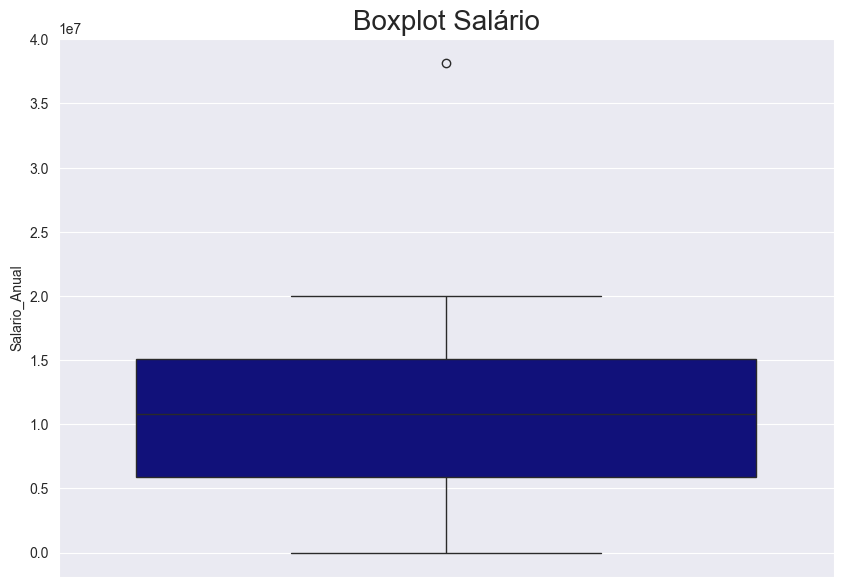

In [12]:
# SELECIONANDO O TEMA DO SEABORN -> whitegrid também funciona
sns.set_style('darkgrid')

plt.figure(figsize = (10, 7))
sns.boxplot(data = df, y = 'Salario_Anual', color = 'darkblue')
plt.title('Boxplot Salário', fontsize = 20)

### Plotando um histograma

Text(0, 0.5, 'Contagem')

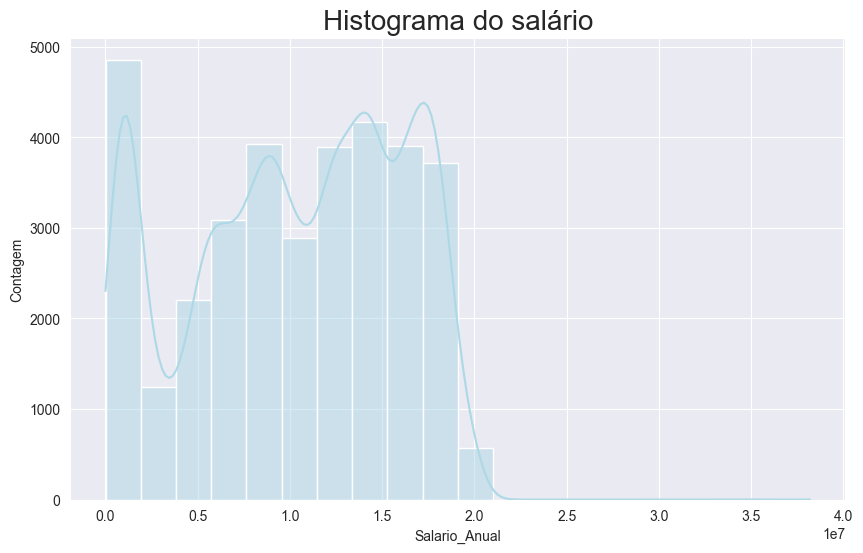

In [13]:
sns.set_style('darkgrid')

plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Salario_Anual', color = 'lightblue', bins = 20, kde = True)
plt.title('Histograma do salário', fontsize = 20)
plt.xlabel('Salario_Anual')
plt.ylabel('Contagem')


### Tirando a mediana de valores abaixo de 2.000.000

In [12]:
salarios_abaixo_20milhoes = df[df['Salario_Anual'] < 2000000]
mediana_salarios_abaixo_20milhoes = salarios_abaixo_20milhoes['Salario_Anual'].median()
media_salarios_abaixo_20milhoes = salarios_abaixo_20milhoes['Salario_Anual'].mean()

print(f'Média antiga: {media_salario_anual}')
print(f'Nova média: {media_salarios_abaixo_20milhoes}')
print(f'Diff: {media_salario_anual - media_salarios_abaixo_20milhoes}\n')

print(f'Mediana antiga: {mediana_salario_anual}')
print(f'Nova mediana: {mediana_salarios_abaixo_20milhoes}')
print(f'Diff: {mediana_salario_anual - mediana_salarios_abaixo_20milhoes}')

Média antiga: 10612292.648714246
Nova média: 1011298.8648760213
Diff: 9600993.783838226

Mediana antiga: 10787603.0
Nova mediana: 1011687.0
Diff: 9775916.0


Substituindo os valores nulos pela nova mediana

In [10]:
# CORREÇÃO DO CÓDIGO ---> IGNORAR
# salarios_abaixo_2milhoes = df[df['Salario_Anual'] < 2000000]
# mediana_salarios_abaixo_2milhoes = salarios_abaixo_2milhoes['Salario_Anual'].median()
# df['Salario_Anual'] = df['Salario_Anual'].replace({10787603.0: 1011687.0})
# mediana_salarios_abaixo_2milhoes

df['Salario_Anual'].fillna(mediana_salario_abaixo_2milhoes, inplace=True)

df['Salario_Anual'].describe()

count    9.970800e+04
mean     4.214337e+06
std      5.531415e+06
min      1.158000e+03
25%      1.011687e+06
50%      1.011687e+06
75%      6.444375e+06
max      3.819017e+07
Name: Salario_Anual, dtype: float64

### Coluna Churn

Vendo a distribuição dos valores da coluna

Text(0.5, 1.0, 'Histograma da coluna Churn')

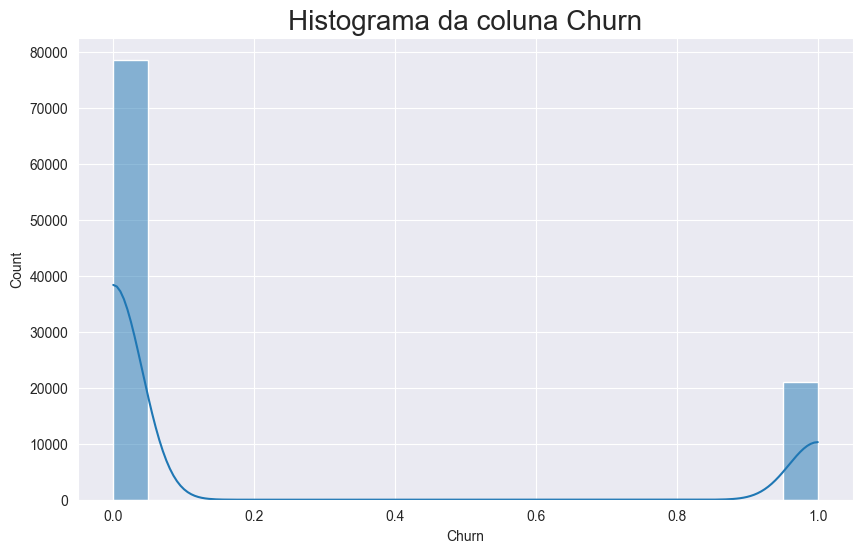

In [16]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Churn', bins = 20, kde = True)
plt.title('Histograma da coluna Churn', fontsize = 20)

In [18]:
(df['Churn'].value_counts(normalize = True) * 100).round(1)

Churn
0.0    78.9
1.0    21.1
Name: proportion, dtype: float64

Removendo valores de Churn que são nulos

In [19]:
df.dropna(subset = ['Churn'], inplace = True)

Salvando o dataframe

In [11]:
df_tratado = df.to_csv('../Dados/CHURN_CREDIT_MOD14_TRATADO.csv', index = False, encoding = 'utf-8')
df_tratado = pd.read_csv('../Dados/CHURN_CREDIT_MOD14_TRATADO.csv', delimiter =',')
print(df_tratado.isnull().sum())

Credit_Score     0
Pais             0
Genero           0
Idade            0
Tempo_Credito    0
Balanco          0
Qtd_Produtos     0
Possui_Cartao    0
Membro_Ativo     0
Salario_Anual    0
Churn            0
dtype: int64
